# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [4]:
# a) regressão tip explicada por net_bill
model = smf.ols('tip ~ net_bill', data=tips).fit()
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Sat, 22 Nov 2025   Prob (F-statistic):           5.02e-23
Time:                        20:55:26   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.0

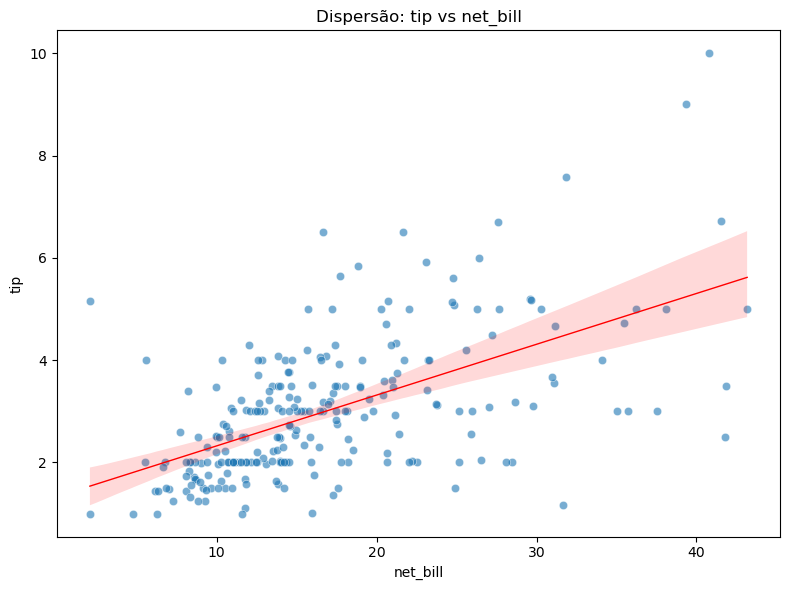

In [5]:
# b) gráfico de dispersão tip vs net_bill (com linha de tendência)
plt.figure(figsize=(8,6))
sns.scatterplot(x='net_bill', y='tip', data=tips, alpha=0.6)
sns.regplot(x='net_bill', y='tip', data=tips, scatter=False, color='red', line_kws={'linewidth':1})
plt.xlabel('net_bill')
plt.ylabel('tip')
plt.title('Dispersão: tip vs net_bill')
plt.tight_layout()
plt.show()



### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Sat, 22 Nov 2025   Prob (F-statistic):           1.52e-06
Time:                        21:01:41   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.0

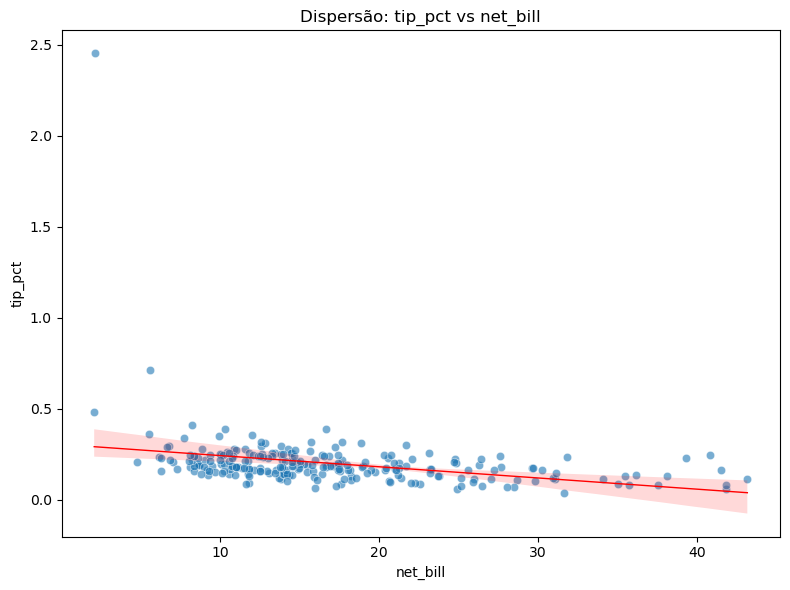

In [6]:
#Regressão tip_pct ~ net_bill e gráfico de dispersão
model_pct = smf.ols('tip_pct ~ net_bill', data=tips).fit()
print(model_pct.summary())

plt.figure(figsize=(8,6))
sns.scatterplot(x='net_bill', y='tip_pct', data=tips, alpha=0.6)
sns.regplot(x='net_bill', y='tip_pct', data=tips, scatter=False, color='red', line_kws={'linewidth':1})
plt.xlabel('net_bill')
plt.ylabel('tip_pct')
plt.title('Dispersão: tip_pct vs net_bill')
plt.tight_layout()
plt.show()

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

# preparar dados
X = tips[['net_bill']].values
y_tip = tips['tip'].values
y_tip_pct = tips['tip_pct'].values

# modelo
lr = LinearRegression()

# ajustes in-sample e previsões
lr.fit(X, y_tip)
pred_tip = lr.predict(X)
lr.fit(X, y_tip_pct)
pred_tip_pct = lr.predict(X)

# métricas in-sample (usar np.sqrt(mean_squared_error(...)) em vez de squared=False)
r2_tip = r2_score(y_tip, pred_tip)
r2_tip_pct = r2_score(y_tip_pct, pred_tip_pct)
rmse_tip = np.sqrt(mean_squared_error(y_tip, pred_tip))
rmse_tip_pct = np.sqrt(mean_squared_error(y_tip_pct, pred_tip_pct))
nrmse_tip = rmse_tip / np.std(y_tip, ddof=0)
nrmse_tip_pct = rmse_tip_pct / np.std(y_tip_pct, ddof=0)

# validação cruzada (RMSE médio)
cv = KFold(n_splits=5, shuffle=True, random_state=42)
neg_mse_cv_tip = cross_val_score(LinearRegression(), X, y_tip, scoring='neg_mean_squared_error', cv=cv)
neg_mse_cv_tip_pct = cross_val_score(LinearRegression(), X, y_tip_pct, scoring='neg_mean_squared_error', cv=cv)
rmse_cv_tip = np.sqrt(-neg_mse_cv_tip).mean()
rmse_cv_tip_pct = np.sqrt(-neg_mse_cv_tip_pct).mean()

# resumo
results = pd.DataFrame({
    'response': ['tip', 'tip_pct'],
    'r2_in_sample': [r2_tip, r2_tip_pct],
    'rmse_in_sample': [rmse_tip, rmse_tip_pct],
    'nrmse_in_sample': [nrmse_tip, nrmse_tip_pct],
    'rmse_cv_mean': [rmse_cv_tip, rmse_cv_tip_pct]
})
print(results)

  response  r2_in_sample  rmse_in_sample  nrmse_in_sample  rmse_cv_mean
0      tip      0.332541        1.128088         0.816982      1.127628
1  tip_pct      0.091291        0.155429         0.953262      0.124285


    • Os dois gráficos mostram relações opostas: tip aumenta com net_bill, enquanto tip_pct tende a diminuir com net_bill. 
    
    • O ajuste para tip capta variação absoluta; o ajuste para tip_pct captura variação relativa (proporcional) — são perspectivas diferentes sobre o mesmo fenômeno.
    
    •Não compare R² diretamente. R² mede a fração da variância da variável resposta específica explicada pelo modelo. Como as respostas são diferentes (tip vs tip_pct, com escalas e distribuições distintas), comparar R²s diretamente não é apropriado.

### 4. Ajuste do modelo em outra escala
Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [13]:
# 1) obter o valor predito pred para tip_pct (usando o modelo model_pct)
pred_tip_pct = model_pct.fittedvalues
tips['pred_tip_pct'] = pred_tip_pct
print(tips['pred_tip_pct'].head())

0    0.207087
1    0.251951
2    0.197684
3    0.180107
4    0.176358
Name: pred_tip_pct, dtype: float64


In [10]:
# 2) obter o valor predito para tip como tip_pct * net_bill
tips['pred_tip_from_pct'] = tips['pred_tip_pct'] * tips['net_bill']
print(tips[['pred_tip_pct','net_bill','pred_tip_from_pct']].head())

   pred_tip_pct  net_bill  pred_tip_from_pct
0      0.207087     15.98           3.309254
1      0.251951      8.68           2.186938
2      0.197684     17.51           3.461450
3      0.180107     20.37           3.668785
4      0.176358     20.98           3.699998


In [11]:
# 3) calcular o R^2 do modelo para tip (usando as previsões obtidas)
from sklearn.metrics import r2_score
r2_pred_tip = r2_score(tips['tip'], tips['pred_tip_from_pct'])
print(r2_pred_tip)

0.1088997484546137


In [12]:
# 4) comparar esse R^2 com o do item 1 (modelo 'model' de tip ~ net_bill)
r2_model1 = model.rsquared if hasattr(model, 'rsquared') else r2_score(tips['tip'], model.fittedvalues)
print("r2_model1 (tip ~ net_bill) =", r2_model1)
print("r2_from_pred_tip_pct =", r2_pred_tip)
print("difference =", r2_pred_tip - r2_model1)

r2_model1 (tip ~ net_bill) = 0.3325407312323705
r2_from_pred_tip_pct = 0.1088997484546137
difference = -0.2236409827777568
